In [53]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10

## Pre-processing

In [54]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [55]:
!pwd
write_dir = home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [56]:
all_sim_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/probC_sim_learning_signals_processed.csv')

In [57]:
all_sim_data.head(10)

,Unnamed: 0,cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,ID,cond,id_choices,correct_id_choices,b_t0,b_t1,ideal_B,B_ideal_target,B_nonideal_target
0,0,0.025334,0.000000,0.000000,0,0.013572,0.416406,0.700,False,0,761,lc,0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.022106,0.000000,0.000000,0,0.013572,0.525334,0.700,False,0,761,lc,0,1,0.000000,0.038001,0.038001,0.038001,0.000000
2,2,0.020935,0.038001,-0.038001,0,0.013572,0.522106,0.700,False,0,761,lc,0,1,0.000000,0.070320,0.070320,0.070320,0.000000
3,3,0.020345,0.070320,-0.070320,0,0.051574,0.520935,0.700,False,0,761,lc,0,1,0.000000,0.100251,0.100251,0.100251,0.000000
4,4,0.646769,0.100251,-0.100251,0,0.121894,0.520345,0.700,False,0,761,lc,0,1,0.000000,0.128728,0.128728,0.128728,0.000000
5,5,0.072232,0.128728,-0.128728,0,0.222144,1.146769,0.700,False,0,761,lc,0,1,2.375416,1.015624,-1.359791,1.015624,2.375416
6,6,0.026769,-1.359791,1.359791,0,0.350872,0.572232,0.700,False,0,761,lc,0,1,0.651961,1.050611,0.398651,1.050611,0.651961
7,7,0.022626,0.398651,-0.398651,0,1.000000,0.526769,0.172,False,0,761,lc,0,1,0.360797,1.062641,0.701844,1.062641,0.360797
8,8,0.021194,0.701844,-0.701844,0,0.601349,0.522626,0.332,False,0,761,lc,0,1,0.243166,1.072537,0.829371,1.072537,0.243166
9,9,0.020494,0.829371,-0.829371,0,0.100495,0.521194,0.700,False,0,761,lc,0,1,0.179307,1.081596,0.902289,1.081596,0.179307


In [58]:
all_sim_data.columns = all_sim_data.columns.str.strip()
all_sim_data.head()
all_sim_data = all_sim_data[all_sim_data.rt<0.6]
all_sim_data.reset_index(drop=True, inplace=True)

In [59]:
all_sim_data = all_sim_data.rename(index=str, columns={"acc": "response"})
all_sim_data = all_sim_data[['response', 'rt', 'cond', 'subj_idx', 'choice_B', 'cpp']] 
all_sim_data = all_sim_data.rename(index=str, columns={'choice_B': 'B'})

In [35]:
all_sim_data['cond'] = all_sim_data['cond'].str.strip()
all_sim_data.head()

,response,rt,cond,subj_idx,B,cpp
0,False,0.172,lc,0,-0.398651,0.022626
1,False,0.332,lc,0,-0.701844,0.021194
2,True,0.422,lc,0,-0.902289,0.408017
3,True,0.352,lc,0,-1.914075,0.023195
4,True,0.342,lc,0,2.340844,0.034013


In [36]:
np.unique(all_sim_data.subj_idx), np.unique(all_sim_data.cond)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object))

In [37]:
all_sim_data = hddm.utils.flip_errors(all_sim_data)

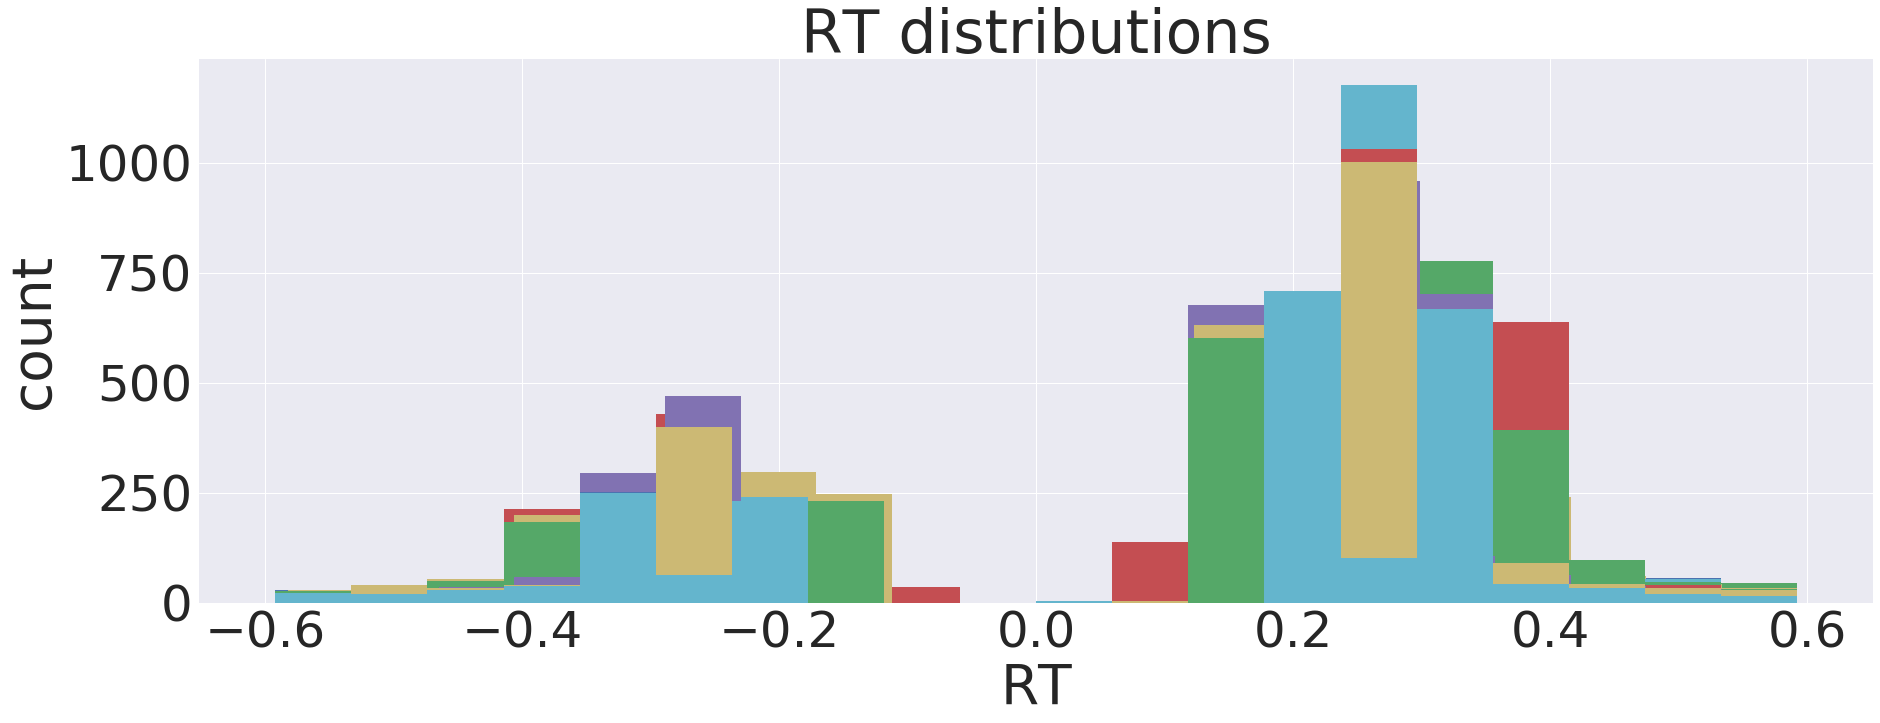

In [38]:
plt.rcParams['figure.figsize'] = 30, 10
sns.set(font_scale=5)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_sim_data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [39]:
all_sim_data.columns

Index(['response', 'rt', 'cond', 'subj_idx', 'B', 'cpp'], dtype='object')

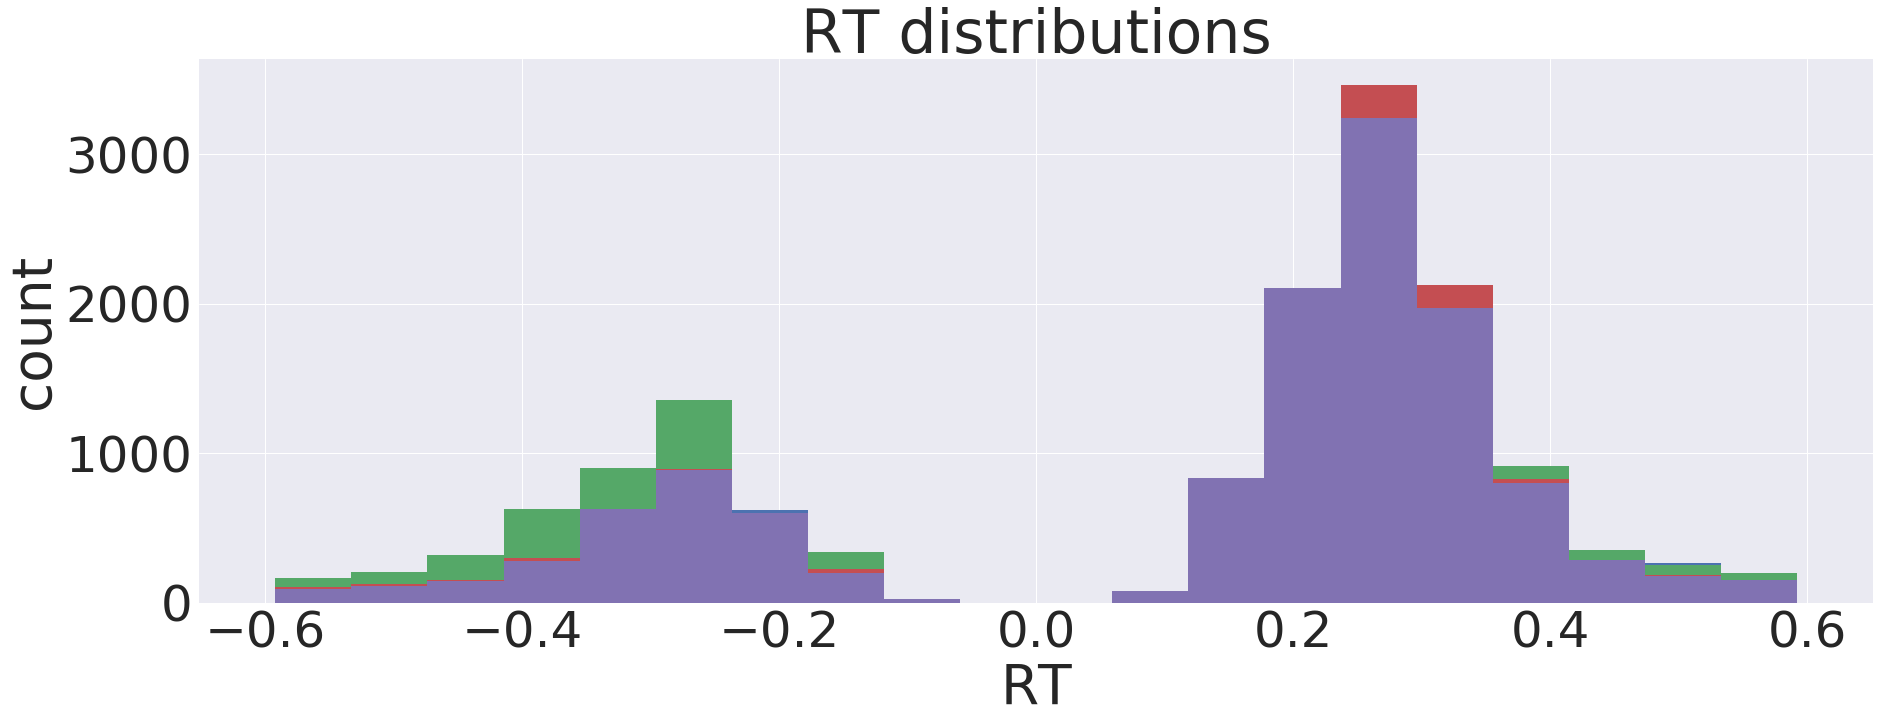

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_sim_data.groupby('cond'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

Text(0,0.5,'B')

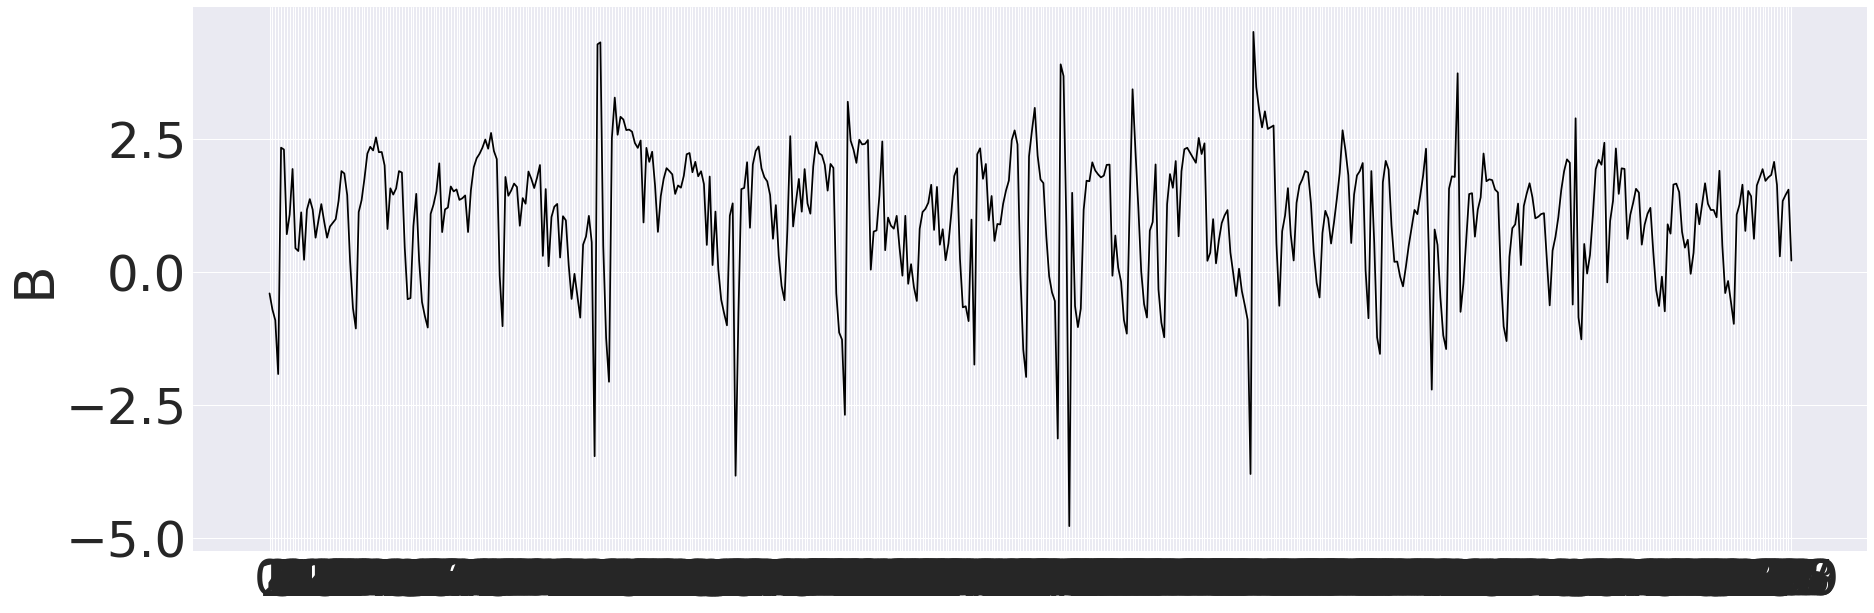

In [41]:
plt.plot(all_sim_data.B[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('B')

Text(0,0.5,'error-flipped rt')

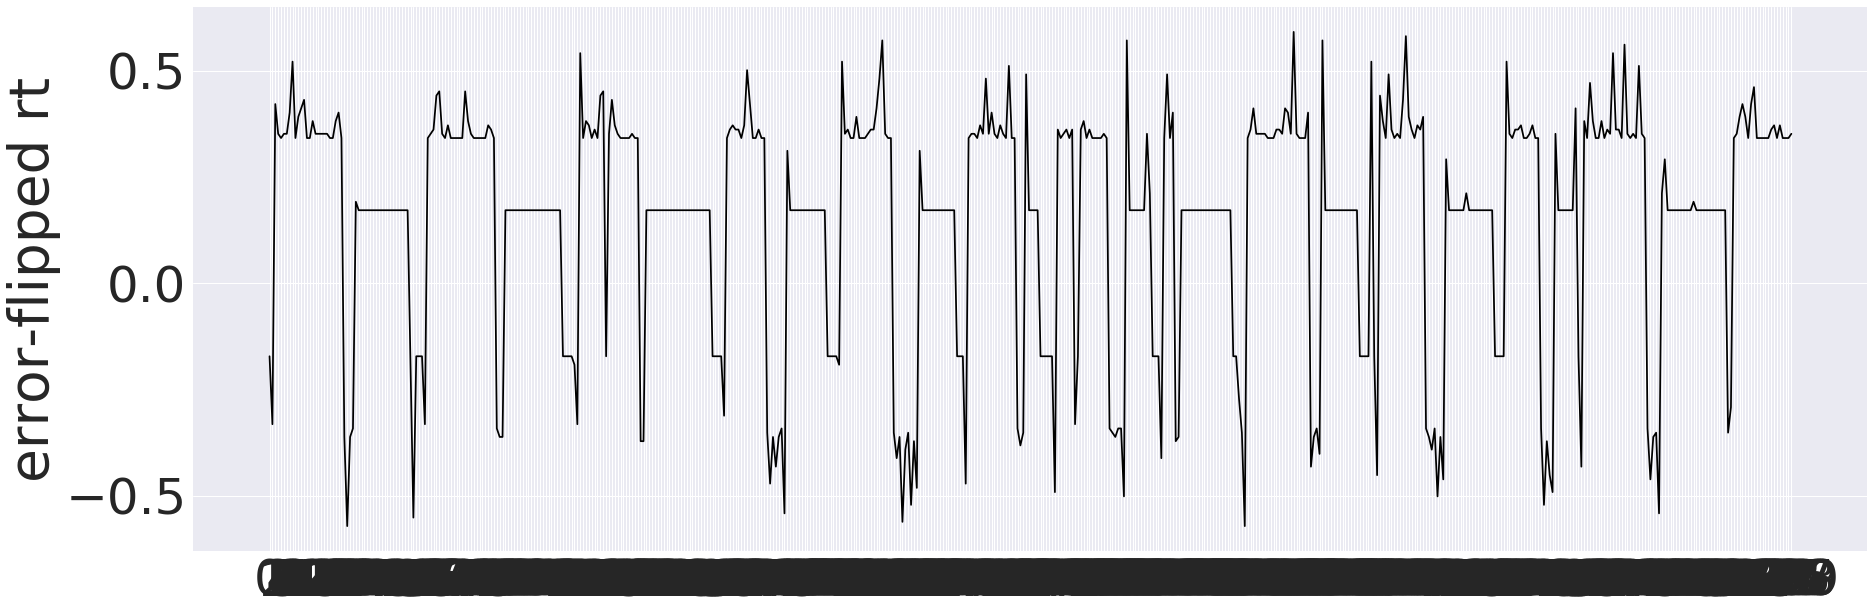

In [42]:
plt.plot(all_sim_data.rt[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('error-flipped rt')

Text(0,0.5,'cpp')

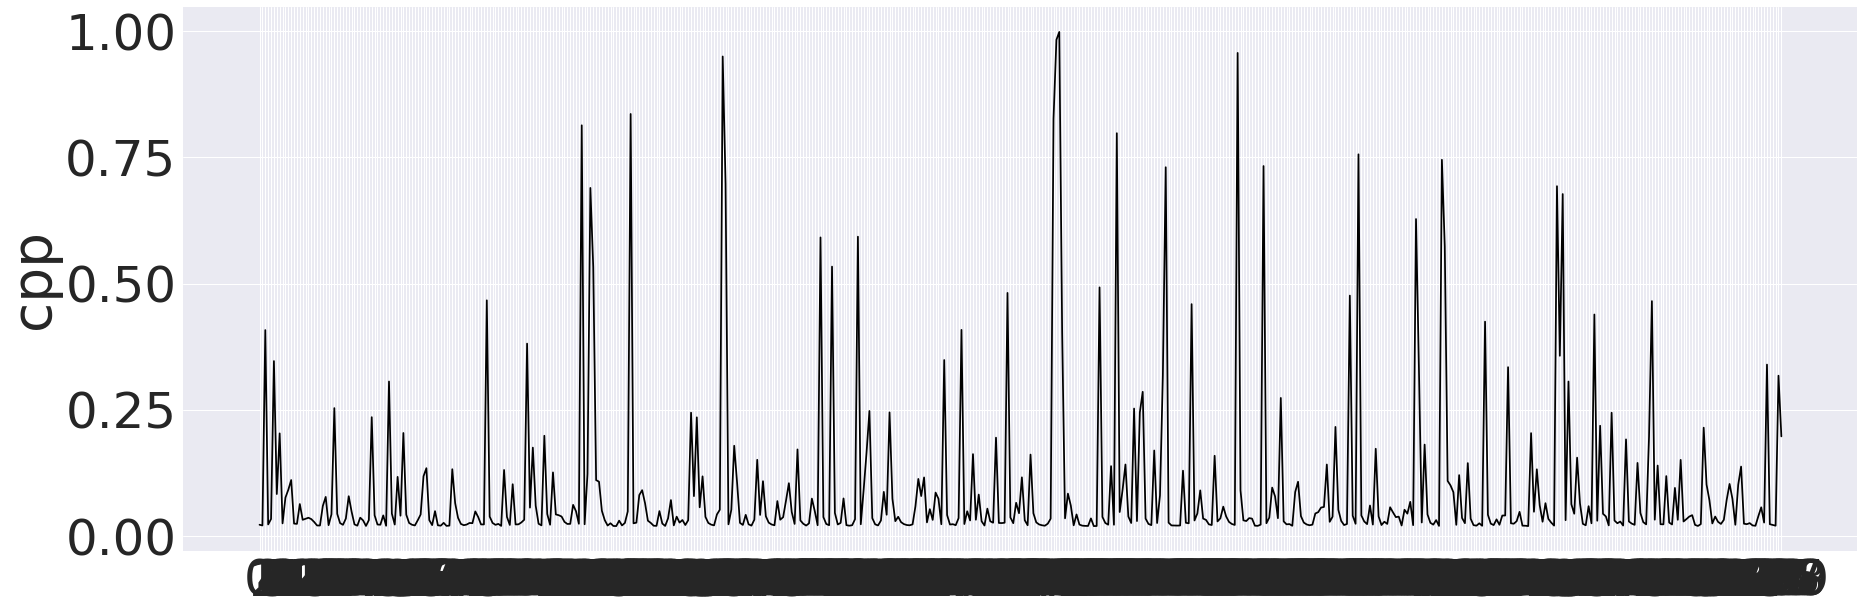

In [43]:
plt.plot(all_sim_data.cpp[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('cpp')

Text(0,0.5,'error-flipped accuracy')

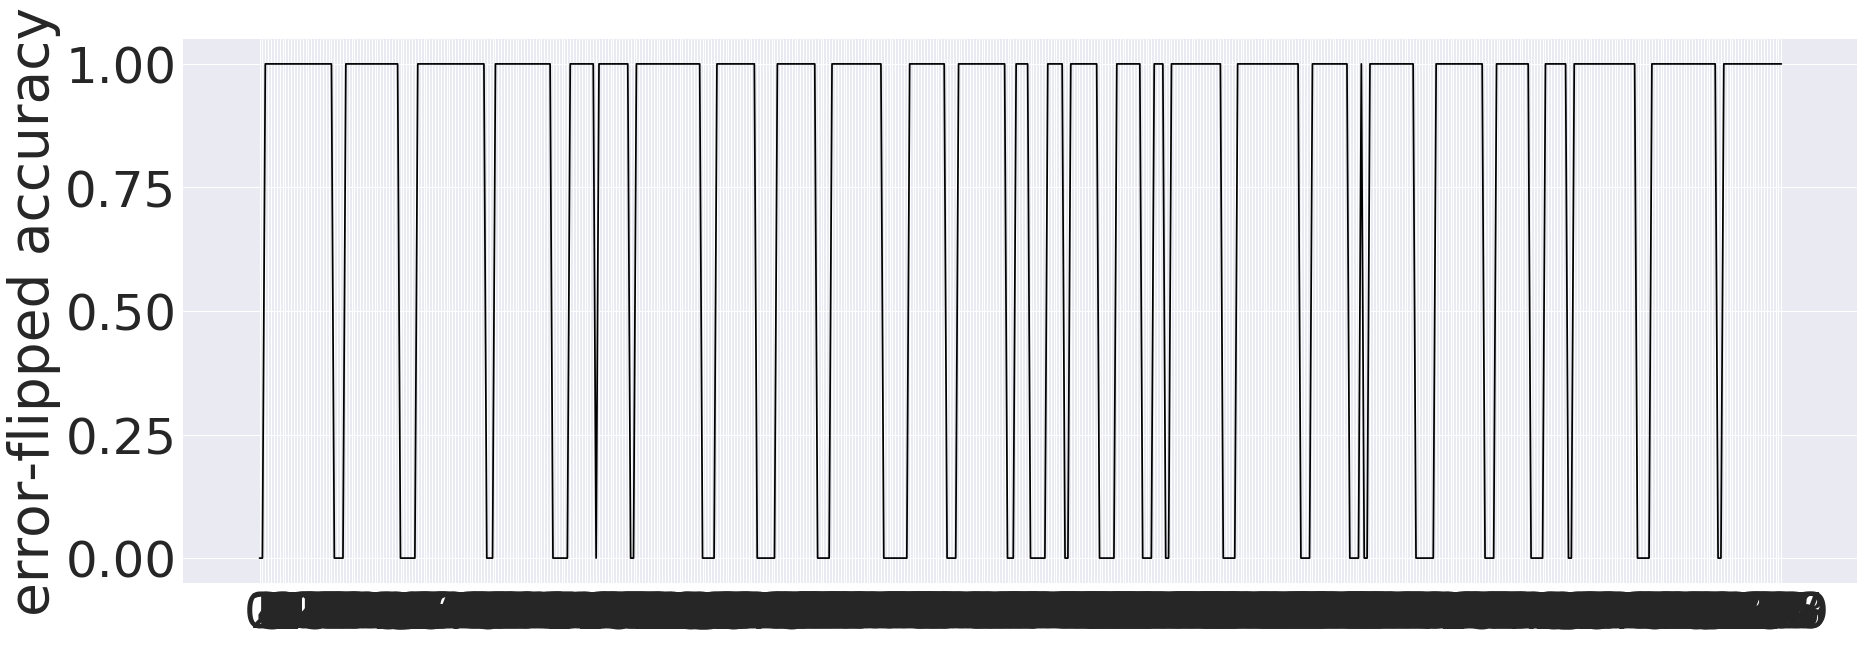

In [44]:
plt.plot(all_sim_data.response[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('error-flipped accuracy')

In [45]:
#learning signals
learning_signals =['cpp:C(cond)','B:C(cond)']
B = learning_signals[1]
cpp = learning_signals[0]
#targets
targets  = [ 'v ~ ', 'a ~ ', 't ~ ']
include=['v', 't', 'a']
v = targets[0]
a = targets[1]
tr = targets[2]

# n_samples, n_burned_samples = 1000, 50
n_samples, n_burned_samples = 500, 50

In [46]:
v+B, a+cpp

('v ~ B:C(cond)', 'a ~ cpp:C(cond)')

#### v -> b and a -> cpp 

In [50]:
v_B_a_cpp_subj_sim_reg = hddm.HDDMRegressor(all_sim_data,[v+B, a+cpp],bias=False, include=include, informative=True)
v_B_a_cpp_subj_sim_reg.sample(n_samples,burn=n_burned_samples,dbname='v_B_a_cpp_subj_sim_reg_TEST_choiceB.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]']
Adding these covariates:
['a_Intercept', 'a_cpp:C(cond)[hc]', 'a_cpp:C(cond)[hv]', 'a_cpp:C(cond)[lc]', 'a_cpp:C(cond)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 4346.5 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

#### v,a,t -> b 

In [47]:
v_a_t_B_subj_sim_reg = hddm.HDDMRegressor(all_sim_data,[v+B, a+B, tr+B],bias=False, include=include, informative=True)
v_a_t_B_subj_sim_reg.sample(n_samples,burn=n_burned_samples,dbname='v_a_t_B_subj_sim_reg_TEST_choiceB.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(cond)[hc]', 'a_B:C(cond)[hv]', 'a_B:C(cond)[lc]', 'a_B:C(cond)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(cond)[hc]', 't_B:C(cond)[hv]', 't_B:C(cond)[lc]', 't_B:C(cond)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 8559.4 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

#### v,a -> b | t ->  cpp  

In [48]:
v_a_B_t_cpp_subj_sim_reg = hddm.HDDMRegressor(all_sim_data,[v+B, a+B, tr+cpp],bias=False, include=include, informative=True)
v_a_B_t_cpp_subj_sim_reg.sample(n_samples,burn=n_burned_samples,dbname='v_a_B_t_cpp_subj_sim_reg_TEST_choiceB.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(cond)[hc]', 'a_B:C(cond)[hv]', 'a_B:C(cond)[lc]', 'a_B:C(cond)[lv]']
Adding these covariates:
['t_Intercept', 't_cpp:C(cond)[hc]', 't_cpp:C(cond)[hv]', 't_cpp:C(cond)[lc]', 't_cpp:C(cond)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 10259.1 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

#### t -> cpp | v -> b  

In [49]:
t_cpp_v_B_subj_sim_reg = hddm.HDDMRegressor(all_sim_data,[tr+cpp, v+B],bias=False, include=include, informative=True)
t_cpp_v_B_subj_sim_reg.sample(n_samples,burn=n_burned_samples,dbname='t_cpp_v_B_subj_sim_reg_TEST_choiceB.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(cond)[hc]', 't_cpp:C(cond)[hv]', 't_cpp:C(cond)[lc]', 't_cpp:C(cond)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 4898.1 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [51]:
dics = [v_a_t_B_subj_sim_reg.dic, v_a_B_t_cpp_subj_sim_reg.dic, t_cpp_v_B_subj_sim_reg.dic, ]
m_names = ['v_a_t_B_subj_sim_reg', 'v_a_B_t_cpp_subj_sim_reg', 't_cpp_v_B_subj_sim_reg']

In [52]:
dics

[-70267.626867286905, -70305.940269257539, -70077.014574414978]

Text(0.5,1,'Sanity check: Fitting simulated data to top 3 regression models from observed data')

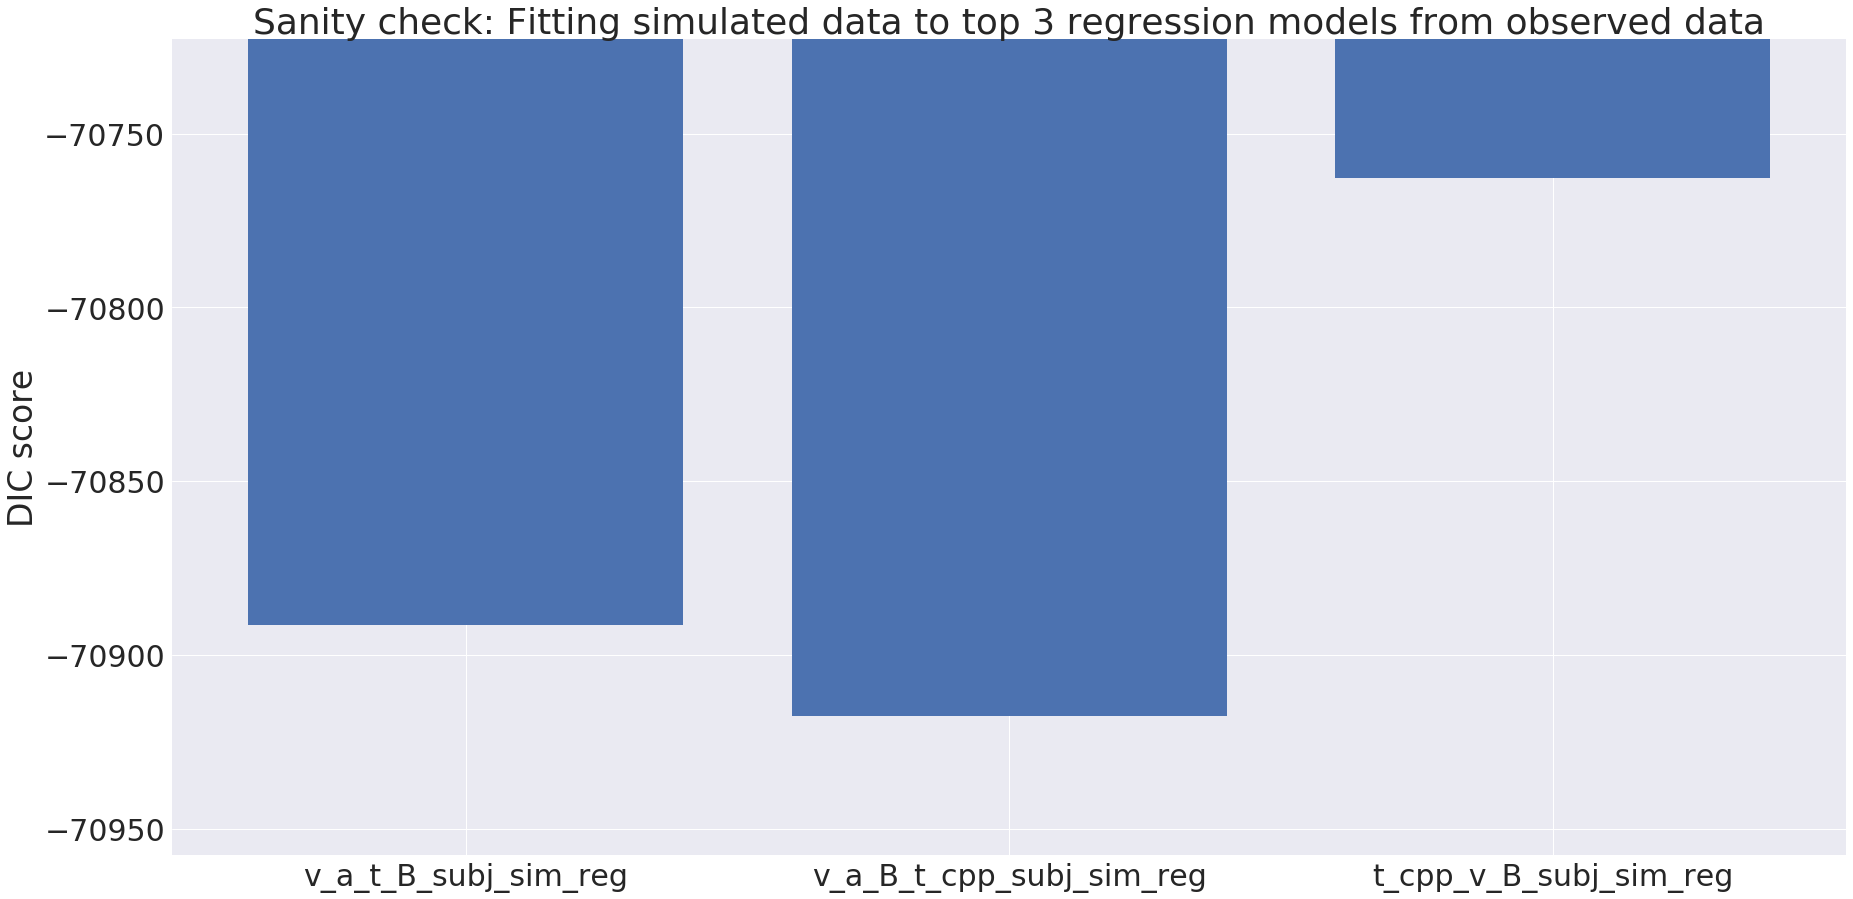

In [27]:
plt.figure(figsize=(30,15))
sns.set(font_scale=3)  
plt.bar(m_names, dics)
plt.ylabel('DIC score')
plt.ylim([min(dics) - 40, max(dics) + 40])
plt.title('Sanity check: Fitting simulated data to top 3 regression models from observed data')

In [ ]:
dics

In [ ]:
min(dics)

In [ ]:
# model_names_header = ', '.join(m_names)
# print_dics_test_3_obs_models = np.column_stack(dics)
# np.savetxt(write_dir+'sim_test_3_best_obs_models_idealB.csv', print_dics_test_3_obs_models, header=model_names_header, delimiter=',',comments='')

In [ ]:
dics_test_gen_df = pd.read_csv(write_dir+'sim_test_gen_model_choiceB.csv')
dics_test_3_best_obs_df = pd.read_csv(write_dir+'sim_test_3_best_obs_models_choiceB.csv')
all_test_dics = pd.concat([dics_test_gen_df, dics_test_3_best_obs_df], axis=1)
all_test_dics.columns = all_test_dics.columns.str.strip()

In [ ]:
all_test_dics

In [ ]:
#get rid of switched gen. model for these purposes -- just comparing generative
#& top 3 observed regression models
all_test_dics = all_test_dics.drop(['v_cpp & a_B'], axis=1)

#use consistent naming scheme 
all_test_dics = all_test_dics.rename(index=str, columns={"v_a_t_B_subj_sim_reg": "v_a_t_B", 
                              "v_a_B_t_cpp_subj_sim_reg": "v_a_B & t_cpp",
                             "t_cpp_v_B_subj_sim_reg": "t_cpp & v_B"})

In [ ]:
sns.barplot(data=all_test_dics)
plt.title("Simulated data fit to top 3 regression models for obs. data & generative model")
plt.ylim([all_test_dics.min(axis=1)[0] - 40, all_test_dics.max(axis=1)[0] + 40])
plt.ylabel('DIC score')
plt.xlabel('regression model')

In [ ]:
all_test_dics

In [ ]:
worst_model, winning_model = all_test_dics.idxmax(axis=1)[0], all_test_dics.idxmin(axis=1)[0]
print('winning model: ', winning_model, '\nworst model: ', worst_model)

In [ ]:
plt.figure(figsize=(30,15))
sns.set(font_scale=3)  
plt.bar(m_names, dics)
plt.ylabel('DIC score')
plt.ylim([min(dics) - 40, max(dics) + 40])
plt.title('Sanity check: Fitting simulated data to top 3 regression models from observed data')

## Check convergence 

In [ ]:
v_a_t_B_subj_sim_reg.plot_posteriors()

In [ ]:
v_a_B_t_cpp_subj_sim_reg.plot_posteriors()

In [ ]:
t_cpp_v_B_subj_sim_reg.plot_posteriors()